# Normality Test

정규성 검정

데이터가 정규분포를 따르는지 검증합니다. 모수적 통계 검정을 사용하기전에 모수적 통계 검정의 전제인 정규성을 테스트하기 위해 주로 사용합니다. Normality Test 의 귀무가설은 '표본이 정규성을 가진다'입니다. 따라서 p-value 가 0.05 보다 작으면 (p < 0.05) 표본이 정규성을 가지지 않는다는 것으로 판단합니다.

* Shapiro-Wilk Test
  * https://en.wikipedia.org/wiki/Shapiro%E2%80%93Wilk_test
  * https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
* D'Agostino's K-squared test
  * https://en.wikipedia.org/wiki/D%27Agostino%27s_K-squared_test
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.normaltest.html
* Anderson–Darling test
  * https://en.wikipedia.org/wiki/Anderson%E2%80%93Darling_test
  * http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html

https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411

**모수적 방법(Parametric Method)**

통계학의 중심극한정리에 따라 무작위로 복원 추출된 랜덤 샘플로 구성된 연속형 표본평균의 분포는 정규분포를 따르게 됩니다. 이런 정규성을 가진다는 모수적 특성을 이용하여 비교하고자 하는 집단이 모두 정규 분포를 따르고 집단내의 분산이 같다면 집단간의 평균을 비교함으로써 차이를 밝히는 방법을 모수적 방법(Parametric Method)이라고 합니다. 일반적으로 각 집단의 랜덤 샘플 표본이 30개 이상이면 정규성을 따른다고 가정합니다. 대표적인 모수적 검정 방법으로는 F-Test, T-Test, ANOVA 등이 있습니다.

**비모수적 방법(Nonparametric Method)**

랜덤 샘플 표본수는 충분하지만 정규분포 가정을 만족시키지 못하거나 각 집단의 랜덤 샘플 표본이 10개 이하인 경우 처럼 모집단의 분포 유형에 상관 없이 사용할 수 있는 방법을 비모수적 방법(Nonparametric Method)이라고 합니다. 대표적인 비모수적 검정방법으로는 순위합검정, 부호검정 등이 있습니다. 

In [1]:
import numpy as np
from scipy import stats

np.random.seed(1)
# generate univariate observations
np_data = 2 * np.random.randn(100) + 50
print("mean={}, stdv={}".format(np.mean(np_data), np.std(np_data)))

# Shapiro-Wilk Test
statistic, p = stats.shapiro(np_data)
print("Shapiro-Wilk Test: statistic={}, p={}".format(statistic, p))

# D'Agostino's K-squared test
statistic, p = stats.normaltest(np_data)
print("D'Agostino's K-squared test: statistic={}, p={}".format(statistic, p))

# Anderson–Darling test
# Notes
# Critical values provided are for the following significance levels:
# normal/exponenential
# 15%, 10%, 5%, 2.5%, 1%
# logistic
# 25%, 10%, 5%, 2.5%, 1%, 0.5%
# Gumbel
# 25%, 10%, 5%, 2.5%, 1%
# If the returned statistic is larger than these critical values then for the corresponding significance level, 
# the null hypothesis that the data come from the chosen distribution can be rejected. 
statistic, critical_values, significance_level = stats.anderson(np_data)
print("Anderson–Darling test: statistic={}".format(statistic))
for c, s in zip(critical_values, significance_level):
    if statistic > c:
        print("\tsignificance_level={}, reject H0".format(s/100))                
    else:
        print("\tsignificance_level={}, accept H0".format(s/100))        

mean=50.12116570415139, stdv=1.7703124276631699
Shapiro-Wilk Test: statistic=0.9920048713684082, p=0.821578860282898
D'Agostino's K-squared test: statistic=0.10202388832581724, p=0.950267320316962
Anderson–Darling test: statistic=0.21965088555943169
	significance_level=0.15, accept H0
	significance_level=0.1, accept H0
	significance_level=0.05, accept H0
	significance_level=0.025, accept H0
	significance_level=0.01, accept H0


표본이 정규성을 만족하는지는 Histogram과 QQ-Plot을 통해 시각화를 통해서도 간단하게 살펴볼 수 있습니다.

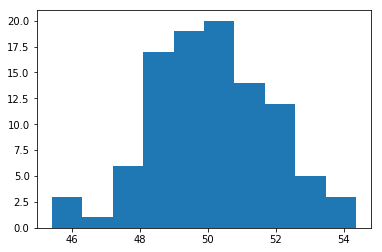

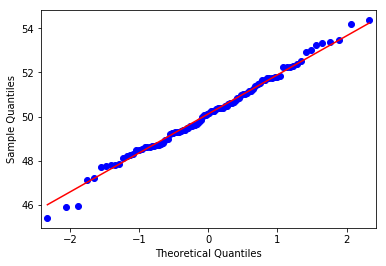

In [2]:
%matplotlib inline 
from matplotlib import pyplot as plt
from statsmodels.graphics.gofplots import qqplot

# Hist
plt.hist(np_data)
plt.show()

# q-q plot
qqplot(np_data, line='s')
plt.show()